### Load tensorflow

In [1]:
import tensorflow as tf

### Collect Data

In [2]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.cifar10.load_data()

In [3]:
trainX.shape

(50000, 32, 32, 3)

In [4]:
testX.shape

(10000, 32, 32, 3)

In [5]:
trainY[0]

array([6], dtype=uint8)

### Convert Output label to multiple values

In [7]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Build the Graph

In [19]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((3072,),input_shape=(32,32,3,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

## Build the Graph...

In [20]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [21]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [22]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [23]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [24]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Build the Graph...

In [25]:
#Compile the model
sgd_op = tf.keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd_op, loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 3072)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 3072)              12288     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               614600    
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 60)               

## Train the model

In [27]:
trainX.shape

(50000, 32, 32, 3)

In [28]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=64)

Epoch 1/10
782/782 [==============================] - 9s 10ms/step - loss: 1.8461 - accuracy: 0.3417 - val_loss: 1.5345 - val_accuracy: 0.4543
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 1.5105 - accuracy: 0.4563 - val_loss: 1.4428 - val_accuracy: 0.4851
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 1.4004 - accuracy: 0.5021 - val_loss: 1.4162 - val_accuracy: 0.4984
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 1.3407 - accuracy: 0.5221 - val_loss: 1.4348 - val_accuracy: 0.4892
Epoch 5/10
782/782 [==============================] - 8s 11ms/step - loss: 1.2745 - accuracy: 0.5466 - val_loss: 1.4166 - val_accuracy: 0.5029
Epoch 6/10
782/782 [==============================] - 8s 11ms/step - loss: 1.2211 - accuracy: 0.5689 - val_loss: 1.3951 - val_accuracy: 0.5115
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 1.1776 - accuracy: 0.5849 - val_loss: 1.4145 - val_accuracy: 0.5083

In [29]:
model.save('mnist_dnn_v1.h5')

In [30]:
testX[0:1].shape

(1, 32, 32, 3)

In [31]:
testY[8]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
pred = model.predict(testX[8:9])
pred

array([[2.0829088e-03, 3.9217132e-04, 2.9224468e-02, 2.1919498e-01,
        9.0606235e-02, 4.9103981e-01, 2.7308857e-02, 1.3767520e-01,
        1.0848435e-03, 1.3905272e-03]], dtype=float32)

In [33]:
import numpy as np

In [34]:
np.argmax(pred[0])

5

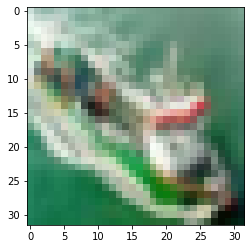

In [42]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[15])